All outputs will be saved under: C:\Users\HP\Desktop\New folder (57)\regression_materials
Generating synthetic band structure data...


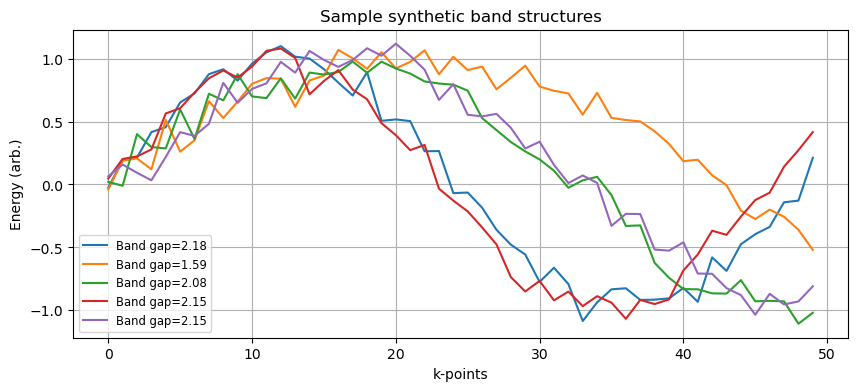

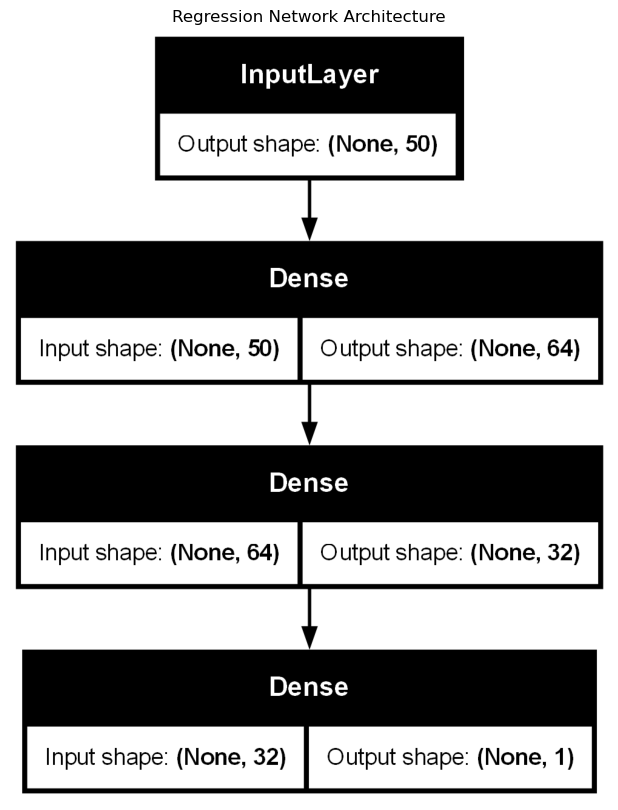

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           3,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,377 (21.00 KB)

 Trainable params: 5,377 (21.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
16/16 - 3s - 180ms/step - loss: 2.2828 - mse: 2.2828 - val_loss: 0.2308 - val_mse: 0.2308
Epoch 2/100
16/16 - 0s - 14ms/step - loss: 0.1450 - mse: 0.1450 - val_loss: 0.1194 - val_mse: 0.1194
Epoch 3/100
16/16 - 0s - 14ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0289 - val_mse: 0.0289
Epoch 4/100
16/16 - 0s - 18ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0169 - val_mse: 0.0169
Epoch 5/100
16/16 - 0s - 14ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 6/100
16/16 - 0s - 14ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0120 - val_mse: 0.0120
Epoch 7/100
16/16 - 0s - 23ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 8/100
16/16 - 0s - 18ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 9/100
16/16 - 0s - 23ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 10/100
16/16 - 0s - 13ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0112 - val_

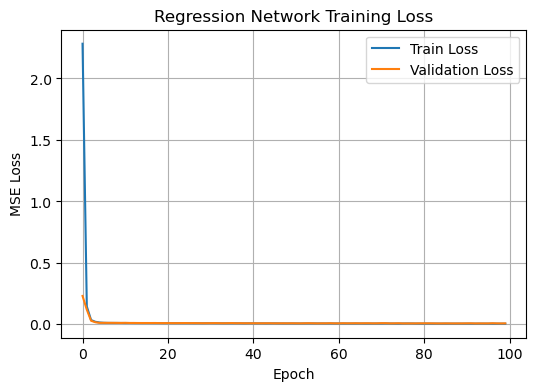

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


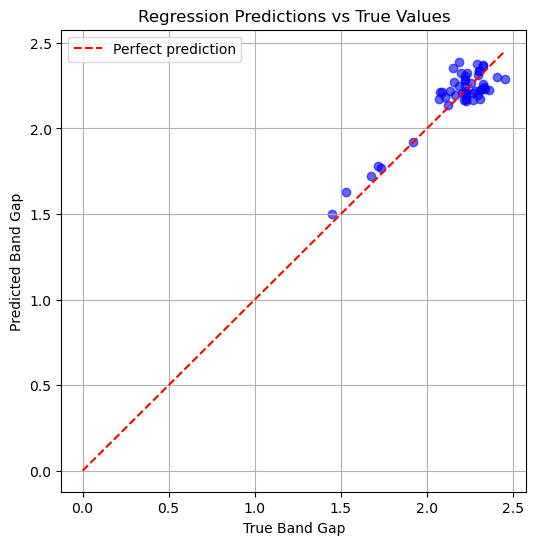

Regression network for material property prediction completed. All outputs saved under: C:\Users\HP\Desktop\New folder (57)\regression_materials


In [2]:
# regression_material_properties_full.py

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
import matplotlib.image as mpimg


# Folder structure

BASE_DIR = os.path.join(os.getcwd(), "regression_materials")
PLOTS_DIR = os.path.join(BASE_DIR, "outputs", "plots")
MODELS_DIR = os.path.join(BASE_DIR, "outputs", "models")

for d in [PLOTS_DIR, MODELS_DIR]:
    os.makedirs(d, exist_ok=True)

print("All outputs will be saved under:", BASE_DIR)


# Generate synthetic dataset

def generate_synthetic_band_data(num_samples=500, num_kpoints=50):
    
    #Simulate band structures (num_kpoints energy values) and corresponding band gap
    
    X = np.zeros((num_samples, num_kpoints))
    y = np.zeros((num_samples, 1))
    for i in range(num_samples):
        # Simulate a band structure: combination of sine waves
        k = np.linspace(0, np.pi, num_kpoints)
        band = np.sin(k*np.random.uniform(1,3)) + 0.1*np.random.randn(num_kpoints)
        X[i,:] = band
        # Define band gap as difference between first max and first min
        band_gap = np.max(band) - np.min(band)
        y[i] = band_gap
    return X, y

print("Generating synthetic band structure data...")
X_train, y_train = generate_synthetic_band_data(num_samples=500)
X_test, y_test = generate_synthetic_band_data(num_samples=50)


# Visualize sample band structures

def plot_band_samples(X, y, save_path=None):
    fig = plt.figure(figsize=(10,4))
    for i in range(5):
        plt.plot(X[i], label=f"Band gap={y[i,0]:.2f}")
    plt.xlabel("k-points")
    plt.ylabel("Energy (arb.)")
    plt.title("Sample synthetic band structures")
    plt.legend(fontsize='small')
    plt.grid(True)
    if save_path:
        plt.savefig(save_path, dpi=200)
    plt.show()

plot_band_samples(X_train, y_train, save_path=os.path.join(PLOTS_DIR,"sample_band_structures.png"))


# Build regression model

input_dim = X_train.shape[1]
inp = Input(shape=(input_dim,))
x = Dense(64, activation='relu')(inp)
x = Dense(32, activation='relu')(x)
out = Dense(1, activation='linear')(x)

model = Model(inp, out)

# Model plot
plot_model(model, to_file=os.path.join(PLOTS_DIR,'regression_model.png'), show_shapes=True)
data = mpimg.imread(os.path.join(PLOTS_DIR,'regression_model.png'))
plt.figure(figsize=(10,10))
plt.imshow(data)
plt.axis('off')
plt.title("Regression Network Architecture")
plt.savefig(os.path.join(PLOTS_DIR,"regression_model_display.png"), dpi=200)
plt.show()

# Compile and summarize

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.summary()
with open(os.path.join(MODELS_DIR,"regression_model_summary.txt"), "w", encoding="utf-8") as f:
    model.summary(print_fn=lambda x: f.write(x + "\n"))

# Train model

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    verbose=2)

# Plot training/validation loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Regression Network Training Loss")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(PLOTS_DIR,"training_loss.png"), dpi=200)
plt.show()


# Predictions vs true values

y_pred = model.predict(X_test)

# Flatten arrays to 1D
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_test_flat, y_pred_flat, color='blue', alpha=0.6)

# Use flattened arrays for max calculation
max_val = max(y_test_flat.max(), y_pred_flat.max())
plt.plot([0, max_val], [0, max_val], 'r--', label="Perfect prediction")

plt.xlabel("True Band Gap")
plt.ylabel("Predicted Band Gap")
plt.title("Regression Predictions vs True Values")
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(PLOTS_DIR,"predictions_vs_true.png"), dpi=200)
plt.show()

print("Regression network for material property prediction completed. All outputs saved under:", BASE_DIR)
